In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
plotly.tools.set_credentials_file(username='florinlanger', api_key='mgHFSuOS21ds85KkkZNf')
import geopandas as gpd
import pysal as ps

In [2]:
df = pd.read_csv('clean_lending_dataset.csv')

Text(0.5, 1.0, 'Percent of Dataset')

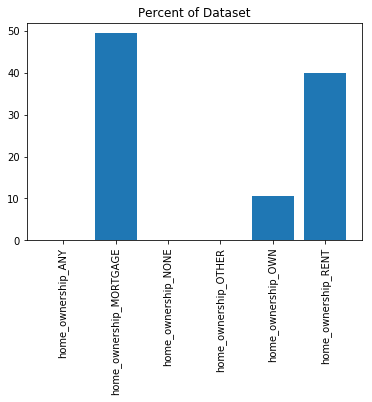

In [35]:
home_owner_cols = [
    'home_ownership_ANY', 
    'home_ownership_MORTGAGE', 
    'home_ownership_NONE', 
    'home_ownership_OTHER', 
    'home_ownership_OWN', 
    'home_ownership_RENT'
]

home_ownership_stats = df[home_owner_cols].sum()/df['home_ownership_ANY'].count()*100

plt.bar(x=home_owner_cols, height=home_ownership_stats)
plt.xticks(rotation=90)
plt.title('Percent of Dataset')

In [109]:
state_default_rate = df.groupby('addr_state')[['loan_status']].apply(lambda x: x.sum()/x.count()) # default rate
state_default_rate.sort_values('loan_status', ascending=False).head()

,loan_status
addr_state,
IA,0.214286
MS,0.159487
AL,0.158967
AR,0.157356
LA,0.157046


In [110]:
colorscale = ['rgb(242,240,247)', 'rgb(218,218,235)', 'rgb(188,189,220)', 'rgb(158,154,200)', 'rgb(117,107,177)', 'rgb(84,39,143)']
endpts = list(np.linspace(state_default_rate['loan_status'].min(), state_default_rate['loan_status'].max(), len(colorscale)))

scl = [(ep, cs) for cs, ep in zip(colorscale, endpts)]

for col in state_default_rate.columns:
    state_default_rate[col] = state_default_rate[col].astype(str)

state_default_rate['text'] = state_default_rate.index + '<br>' + \
    'Late Rate: ' + state_default_rate['loan_status']

data = [go.Choropleth(
#     colorscale = scl,
    autocolorscale = True,
    locations = state_default_rate.index,
    z = state_default_rate['loan_status'].astype(float),
    locationmode = 'USA-states',
    text = state_default_rate['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Percent")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Late Rate by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'state_default_rate-cloropleth-map')

/Users/f/Box/Semester10/Info154/labs/project/env/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [106]:
state_mortgage_rate = df.groupby('addr_state').apply(lambda x: x['home_ownership_MORTGAGE'].sum()/x['home_ownership_MORTGAGE'].count()).to_frame()
state_mortgage_rate.sort_values(0, ascending=False).head()
# number of mortgages to number of late payments

,0
addr_state,
IN,0.668604
WY,0.638393
AL,0.638080
KY,0.632368
AR,0.627273


In [107]:
colorscale = ['rgb(242,240,247)', 'rgb(218,218,235)', 'rgb(188,189,220)', 'rgb(158,154,200)', 'rgb(117,107,177)', 'rgb(84,39,143)']
endpts = list(np.linspace(state_mortgage_rate[0].min(), state_mortgage_rate[0].max(), len(colorscale)))

scl = [(ep, cs) for cs, ep in zip(colorscale, endpts)]

for col in state_mortgage_rate.columns:
    state_mortgage_rate[col] = state_mortgage_rate[col].astype(str)

state_mortgage_rate['text'] = state_mortgage_rate.index + '<br>' + \
    'Late Rate: ' + state_mortgage_rate[0]

data = [go.Choropleth(
#     colorscale = scl,
    autocolorscale = True,
    locations = state_mortgage_rate.index,
    z = state_mortgage_rate[0].astype(float),
    locationmode = 'USA-states',
    text = state_mortgage_rate['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Percent")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Mortgage Rate by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'state_mortgage_rate-cloropleth-map')

/Users/f/Box/Semester10/Info154/labs/project/env/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [128]:
state_rate = state_default_rate.merge(state_mortgage_rate, how='outer', left_index=True, right_index=True)[['loan_status', 0]]
state_rate = state_rate.rename(index=str, columns={0: "mortgage_rate"})
for col in state_rate.columns:
    state_rate[col] = state_rate[col].astype(float)
state_rate.head()

,loan_status,mortgage_rate
addr_state,,
AK,0.136373,0.510233
AL,0.158967,0.638080
AR,0.157356,0.627273
AZ,0.131410,0.522550
CA,0.136292,0.338768


In [130]:
"correlation", state_rate['loan_status'].corr(state_rate['mortgage_rate'])

('correlation', -0.037837362350739034)